<a href="https://colab.research.google.com/github/jy6zheng/TwitterDisasterTweets/blob/master/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

KeyboardInterrupt: ignored

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [0]:
! pip install -q kaggle

In [0]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)  280MB  2020-03-14 01:22:38          18029  
unanimad/dataisbeautiful                                    Reddit - Data is Beautiful                           10MB  2020-03-13 16:34:07            290  
rubenssjr/brasilian-houses-to-rent                          brazilian_houses_to_rent                            117KB  2020-03-15 01:12:22            351  
sudalairajkumar/novel-corona-virus-2019-dataset             Novel Corona Virus 2019 Dataset                     377KB  2020-03-20 03:35:34          62722  
kimjihoo/coronavirusdataset                                 Data

In [0]:
! kaggle competitions download -c nlp-getting-started

  0% 0.00/22.2k [00:00<?, ?B/s]
100% 22.2k/22.2k [00:00<00:00, 27.4MB/s]
  0% 0.00/965k [00:00<?, ?B/s]
100% 965k/965k [00:00<00:00, 64.3MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 56.9MB/s]


In [54]:
path = Path(base_dir + '/data/twitter')
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/content/gdrive/My Drive/fastai-v3/data/twitter')

In [0]:
shutil.move("/content/train.csv", "/content/gdrive/My Drive/fastai-v3/data/twitter") 

Error: ignored

In [0]:
shutil.move("/content/test.csv", "/content/gdrive/My Drive/fastai-v3/data/twitter")
shutil.move("/content/sample_submission.csv", "/content/gdrive/My Drive/fastai-v3/data/twitter")

'/content/gdrive/My Drive/fastai-v3/data/twitter/sample_submission.csv'

In [55]:
data = pd.read_csv(path/'train.csv')
data.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [56]:
extension = 'csv'
filenames = ['train.csv', 'test.csv']
combined_data = pd.concat([pd.read_csv(path/f) for f in filenames ])
combined_data.fillna('None', inplace = True)
combined_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,id,keyword,location,target,text
0,1,None,None,1,Our Deeds are the Reason of this #earthquake M...
1,4,None,None,1,Forest fire near La Ronge Sask. Canada
2,5,None,None,1,All residents asked to 'shelter in place' are ...
3,6,None,None,1,"13,000 people receive #wildfires evacuation or..."
4,7,None,None,1,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...,...
3258,10861,None,None,None,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,None,None,None,Storm in RI worse than last hurricane. My city...
3260,10868,None,None,None,Green Line derailment in Chicago http://t.co/U...
3261,10874,None,None,None,MEG issues Hazardous Weather Outlook (HWO) htt...


In [57]:
table = data.copy()
table = table[['keyword', 'location', 'text', 'target']]
table.fillna('None', inplace= True)
table

,keyword,location,text,target
0,None,None,Our Deeds are the Reason of this #earthquake M...,1
1,None,None,Forest fire near La Ronge Sask. Canada,1
2,None,None,All residents asked to 'shelter in place' are ...,1
3,None,None,"13,000 people receive #wildfires evacuation or...",1
4,None,None,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,None,None,Two giant cranes holding a bridge collapse int...,1
7609,None,None,@aria_ahrary @TheTawniest The out of control w...,1
7610,None,None,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,None,None,Police investigating after an e-bike collided ...,1


In [0]:
bs=48

In [59]:
data_lm = (TextList.from_df(combined_data, cols='text')
 .split_by_rand_pct(0.1)
 .label_for_lm()
 .databunch())

data_lm.show_batch(2)
# data_lm = (TextList.from_folder(path)
#            #Inputs: all the text files in path
#             .filter_by_folder(include=['train', 'test']) 
#            #We may have other temp folders that contain text files so we only keep what's in train and test
#             .split_by_rand_pct(0.1)
#            #We randomly split and keep 10% (10,000 reviews) for validation
#             .label_for_lm()           
#            #We want to do a language model so we label accordingly
#             .databunch(bs=bs))
#  data_lm = (TextList.from_df(labels[['test', 'train']].dropna(), path)
#            .split_by_rand_pct(0.2)
#            .label_for_lm()
#            .databunch(bs = bs))

idx,text
0,orders in xxmaj california xxbos xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school xxbos # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj
1,run over by an ambulance am i lucky ? # xxunk # xxunk xxbos http : / / t.co / xxunk xxmaj twelve feared killed in xxmaj pakistani air ambulance helicopter crash http : / / t.co / xxunk xxbos xxunk waiting for an ambulance xxbos @fouseytube you ok ? xxmaj need a ambulance . xxmaj xxunk that was good ! http : / / t.co / xxunk xxbos xxup


In [0]:
data_lm.save('data_lm.pkl')

In [0]:
shutil.move("/content/data_lm.pkl", "/content/gdrive/My Drive/fastai-v3/data/twitter")

'/content/gdrive/My Drive/fastai-v3/data/twitter/data_lm.pkl'

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [62]:
data_lm.show_batch()

idx,text
0,"rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires xxbos # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj xxunk , xxmaj colorado xxmaj springs areas xxbos i 'm on top of the hill and i can see a fire in the woods ... xxbos xxmaj there"
1,xxmaj forest : xxmaj stop the xxmaj annihilation of the xxmaj salt xxmaj river xxmaj wild xxmaj horse ... https : / / t.co / xxunk via @change xxbos xxunk can you please sign and share this petition to save wild horses in xxmaj arizona . http : / / t.co / xxunk xxrep 4 ? xxbos xxup u.s xxmaj national xxmaj park xxmaj services xxmaj tonto xxmaj national xxmaj
2,too you fucking idiot ? xxbos # xxunk xxmaj attack xxup ii xxmaj xxunk xxmaj training xxmaj machine - xxmaj sets xxmaj simulation - http : / / t.co / xxunk http : / / t.co / xxunk xxbos xxmaj xxunk 's xxunk yet very xxunk response to xxmaj harper 's attack on xxmaj alberta 's xxunk . xxmaj hell xxup yeah xxmaj xxunk ! http : / / t.co
3,blazing through the roof # xxunk xxmaj fifth xxmaj xxunk xxbos xxunk xxunk haha love this ? ? xxbos xxunk xxmaj colorado is a xxmaj spanish word ( [ xxmaj latin xxunk ] meaning ' xxunk ' or ' xxunk ' ) all you xxunk are xxunk it wrong ! ! ! xxbos xxmaj why xxmaj some xxmaj traffic xxmaj is xxmaj freezing xxmaj cold xxmaj and xxmaj some xxmaj
4,tote xxmaj handbag xxmaj women xxmaj cross xxmaj body xxmaj bag xxmaj faux xxmaj leather xxmaj fashion xxmaj purse - xxmaj full reû _ http : / / t.co / xxunk http : / / t.co / xxunk xxbos new summer long thin body bag hip a word skirt xxmaj blue http : / / t.co / xxunk m http : / / t.co / xxunk xxbos xxunk } xxmaj


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [64]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


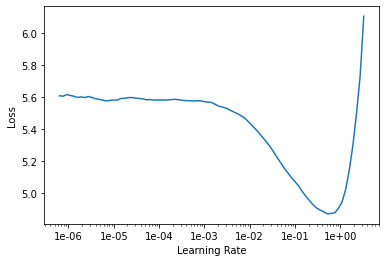

In [65]:
learn.recorder.plot()

In [67]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.435461,3.182960,0.458532,00:15


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

In [78]:
learn.fit_one_cycle(11, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.785852,3.015235,0.478208,00:16
1,2.663162,2.967720,0.486111,00:16
2,2.578849,2.986003,0.490079,00:16
3,2.346081,3.001954,0.494444,00:16
4,2.067160,3.084231,0.498512,00:16
5,1.718816,3.170508,0.504233,00:16
6,1.329903,3.352941,0.503142,00:16
7,1.012765,3.475028,0.504663,00:16
8,0.764922,3.515587,0.505456,00:16
9,0.632388,3.547286,0.506713,00:16


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "I'm happy today that"
N_WORDS = 40
N_SENTENCES = 2

In [82]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I'm happy today that you be a living hell . You 're a lot safer . If you 're a traumatised people they 'll be inundated . xxbos Drop it down on a nigga do damage ! ? ? xxbos
I'm happy today that i see a break from my emotional destruction to watch the British Columbia help xxbos Anyone else getting tons of calls on their cell phone ? Im emotional that Men 's SON absolutely been


In [0]:
learn.save_encoder('fine_tuned_enc')

In [102]:
data_clas = (TextList.from_df(table, cols=['keyword', 'location', 'text'], vocab=data_lm.vocab)
 .split_by_rand_pct(0.2)
 .label_from_df('target')
 .databunch())
data_clas.show_batch()

text,target
xxbos mayhem ? ? xxmaj made in the xxmaj philippines ? ? _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup xxunk xxup with \n xxrep 7 ? \n,0
"xxbos curfew xxmaj xxunk , xxmaj australia xxup info xxup u. xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : xxunk / 6 .",0
xxbos terrorism xxmaj none xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co /,1
xxbos terrorism xxmaj none xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co /,1
xxbos terrorism xxmaj none xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co /,1


In [103]:
data_clas.save('data_clas.pkl')
shutil.move("/content/data_clas.pkl", "/content/gdrive/My Drive/fastai-v3/data/twitter")

'/content/gdrive/My Drive/fastai-v3/data/twitter/data_clas.pkl'

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [105]:
data_clas.show_batch()

text,target
xxbos mayhem ? ? xxmaj made in the xxmaj philippines ? ? _ \n xxrep 5 ? xxup retweet \n xxrep 7 ? \n xxrep 5 ? xxup follow xxup all xxup who xxup rt \n xxrep 7 ? \n xxrep 5 ? xxup xxunk \n xxrep 7 ? \n xxrep 5 ? xxup xxunk xxup with \n xxrep 7 ? \n,0
"xxbos curfew xxmaj xxunk , xxmaj australia xxup info xxup u. xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 . xxup wnd : xxunk / 6 .",0
xxbos terrorism xxmaj none xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co /,0
xxbos hostages xxmaj none xxmaj no # news of # hostages in # xxmaj libya \n \n http : / / t.co / xxunk \n \n # xxmaj india # terrorism # xxmaj africa # xxup ap # xxup ts # xxup nri # xxmaj news # xxup trs # xxup tdp # xxup bjp http : / / t.co / xxunk,1
xxbos terrorism xxmaj none xxmaj truth ... \n https : / / t.co / xxunk \n # xxmaj news \n # xxup bbc \n # xxup cnn \n # xxmaj islam \n # xxmaj truth \n # god \n # xxup isis \n # terrorism \n # xxmaj quran \n # xxmaj lies http : / / t.co /,0


In [143]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc');

RNNLearner(data=TextClasDataBunch;

Train: LabelList (6091 items)
x: TextList
xxbos xxmaj none xxmaj none xxmaj forest fire near xxmaj la xxmaj xxunk xxmaj xxunk . xxmaj canada,xxbos xxmaj none xxmaj none xxmaj all residents asked to ' shelter in place ' are being xxunk by officers . xxmaj no other evacuation or shelter in place orders are expected,xxbos xxmaj none xxmaj none xxmaj just got sent this photo from xxmaj xxunk # xxmaj alaska as smoke from # wildfires xxunk into a school,xxbos xxmaj none xxmaj none # rockyfire xxmaj update = > xxmaj california xxmaj hwy . 20 closed in both xxunk due to xxmaj lake xxmaj county fire - # xxunk # wildfires,xxbos xxmaj none xxmaj none # flood # disaster xxmaj heavy rain causes flash flooding of streets in xxmaj xxunk , xxmaj colorado xxmaj springs areas
y: CategoryList
1,1,1,1,1
Path: .;

Valid: LabelList (1522 items)
x: TextList
xxbos drown xxmaj none xxunk _ put this in xxmaj detroit niggas gone be acting out ? ? tryna fuck n drown mfs xxrep 8

In [144]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


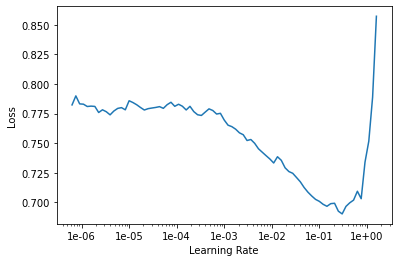

In [145]:
learn.recorder.plot()

In [146]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.580310,0.502789,0.772011,00:11


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [149]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.537961,0.466473,0.795664,00:13


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [152]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.483253,0.445526,0.815374,00:13


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [157]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.437966,0.439413,0.810118,00:14
1,0.421189,0.438022,0.812746,00:13


In [163]:
learn.predict()

(Category 0, tensor(0), tensor([0.9893, 0.0107]))

In [0]:
learn.save('final')

In [0]:
learn.export()